In [18]:
import pandas as pd
import numpy as np
from numpy import array
import os
import sys
import matplotlib.pyplot as plt
import plotly.express as px
#Box-Cox Dönüştürme için 
from scipy import stats

#min_max ölçeklendirm için
from mlxtend.preprocessing import minmax_scaling

# Çizdirme(plot) işlemleri için modülleri ekliyoruz
import seaborn as sns

In [2]:
sys.path.append(os.getcwd()+'\\test_data\\database.csv')  # system path'ine adres eklenir.   
path = sys.path[-1]  #en son eklenen adres kullanılır.
dataset = pd.read_csv(path)

In [6]:
dataset

,index,KEY,GENEL,Press,Release,TOTAL_NAME,Age,Gender,Hand,Capslock,Shift,primary
0,0,K,name,5.386690,5.386692,Kadir Yunus,20-40,Male,Right,1.0,0,kadiryunuskoc@gmail.com
1,1,a,name,5.766926,5.766929,Kadir Yunus,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
2,2,d,name,6.008481,6.008484,Kadir Yunus,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
3,3,i,name,6.193027,6.193029,Kadir Yunus,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
4,4,r,name,6.316909,6.316912,Kadir Yunus,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...
2986,100,R,sabit_password5,209.733826,209.733829,.tie5Roanl,20-40,Male,Right,0.0,1,turan.nabiyev@ibss.com.tr
2987,101,o,sabit_password5,210.225290,210.225292,.tie5Roanl,20-40,Male,Right,0.0,0,turan.nabiyev@ibss.com.tr
2988,102,a,sabit_password5,210.329497,210.329499,.tie5Roanl,20-40,Male,Right,0.0,0,turan.nabiyev@ibss.com.tr
2989,103,n,sabit_password5,210.510930,210.510933,.tie5Roanl,20-40,Male,Right,0.0,0,turan.nabiyev@ibss.com.tr


In [9]:
df_session1 = dataset[dataset["GENEL"] == "sabit_password"]
df_session1

,index,KEY,GENEL,Press,Release,TOTAL_NAME,Age,Gender,Hand,Capslock,Shift,primary
53,53,.,sabit_password,29.107816,29.107819,.tie5Roanl,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
54,54,t,sabit_password,29.359243,29.359245,.tie5Roanl,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
55,55,i,sabit_password,29.576785,29.576788,.tie5Roanl,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
56,56,e,sabit_password,29.807455,29.807458,.tie5Roanl,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
57,57,5,sabit_password,30.161315,30.161318,.tie5Roanl,20-40,Male,Right,0.0,0,kadiryunuskoc@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...
2944,58,R,sabit_password,186.967172,186.967174,.tie5Roanl,20-40,Male,Right,0.0,1,turan.nabiyev@ibss.com.tr
2945,59,o,sabit_password,187.280369,187.280372,.tie5Roanl,20-40,Male,Right,0.0,0,turan.nabiyev@ibss.com.tr
2946,60,a,sabit_password,187.466644,187.466646,.tie5Roanl,20-40,Male,Right,0.0,0,turan.nabiyev@ibss.com.tr
2947,61,n,sabit_password,187.700603,187.700605,.tie5Roanl,20-40,Male,Right,0.0,0,turan.nabiyev@ibss.com.tr


In [23]:
# Özniteliklerin değer almadığı satırlar
df_session1.isnull().sum()

index         0
KEY           5
GENEL         0
Press         0
Release       0
TOTAL_NAME    0
Age           0
Gender        0
Hand          0
Capslock      0
Shift         0
primary       0
dtype: int64

In [24]:
# Toplam kaç hücrede eksik değer (NaN ya da None) var
df_session1.isnull().sum().sum()

5

Text(0.5, 1.0, 'Ölçeklendirilmiş Veri')

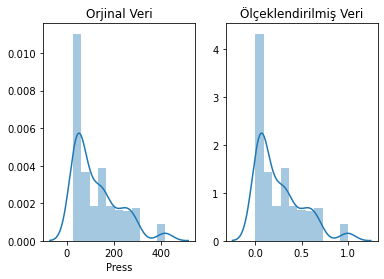

In [19]:
#Verileri 0 ve 1 arasında ölçeklendiriyoruz
df_session1["Press"] = minmax_scaling(df_session1["Press"], columns = [0])

#Her ikisini birlikte karşılaştırmalı olarak çizdiriyoruz
fig, ax = plt.subplots(1, 2)
sns.distplot(df_session1["Press"], ax = ax[0])
ax[0].set_title("Orjinal Veri")
#sns.distplot(scaled_data, ax=ax[1])
#ax[1].set_title("Ölçeklendirilmiş Veri")

Text(0.5, 1.0, 'Normalize edilmiş Veri')

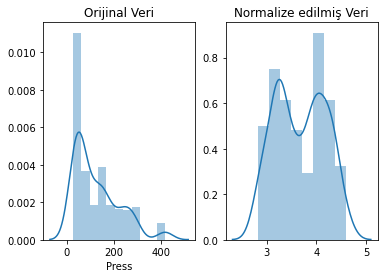

In [22]:
#boxcox ile verilerin eksponansiyel oalrak normalize edilmesi
normalized_data = stats.boxcox(df_session1["Press"])

#Şimdi her ikisinide karşılaştırmalı olarak çizdirelim
fig, ax = plt.subplots(1,2)
sns.distplot(df_session1["Press"], ax = ax[0])
ax[0].set_title("Orijinal Veri")
sns.distplot(normalized_data[0], ax = ax[1])
ax[1].set_title("Normalize edilmiş Veri") 

In [15]:
fig = px.line(df_session1, x = ["Press", "Release"], y ="KEY", color="primary")
fig.show()

In [ ]:
"""
for i in enumerate(dataset.columns):
    #Verileri 0 ve 1 arasında ölçeklendiriyoruz
    print(i)
 
    df_session1["Press"] = minmax_scaling(df_session1["Press"], columns = [0])

    normalized_data = minmax_scaling(normalized_dataset.iloc[:, i], columns = [0])
    normalized_dataset.iloc[:, i] = pd.DataFrame(normalized_data)

"""